In [2]:
%load_ext autoreload
%autoreload 2

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

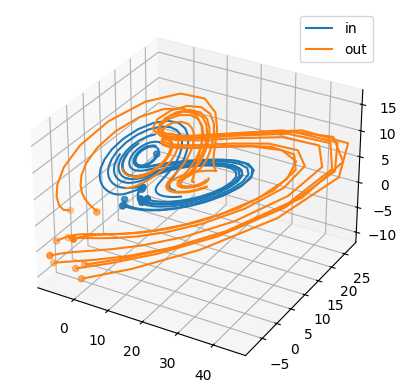

In [6]:
from dynadojo.systems.lorenz import LorenzSystem
from dynadojo.wrappers import SystemChecker
from dynadojo.utils.lds import plot

latent_dim = 3
embed_dim = 3
n = 10
timesteps = 50
system = SystemChecker(LorenzSystem(latent_dim, embed_dim, noise_scale=0))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(n, in_dist=False)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)
plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)